Step size too small, stopping early.
Iterations: 1675
Optimal Point: [-37.60074031  18.80037213]
Minimum Value: 1.546140993013978e-11


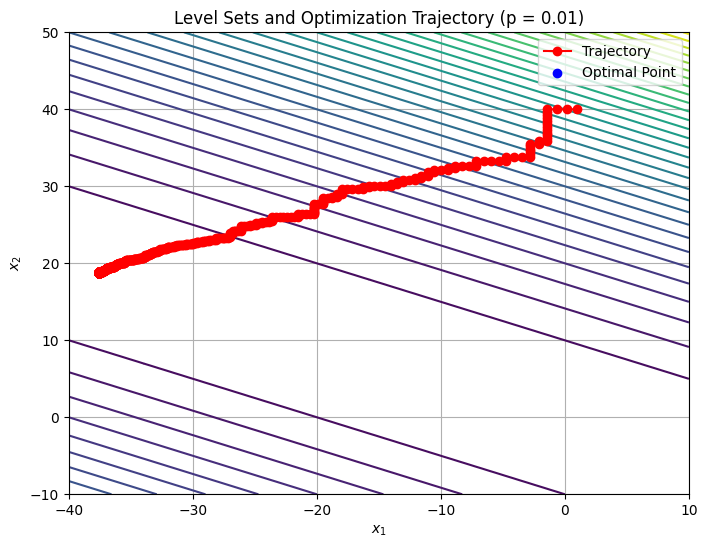

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def objective_function(x):
    x1, x2 = x
    return x1**2 + 4 * x1 * x2 + 4 * x2**2

# Define the gradient of the function
def compute_gradient(x):
    x1, x2 = x
    grad_x1 = 2 * x1 + 4 * x2
    grad_x2 = 4 * x1 + 8 * x2
    return np.array([grad_x1, grad_x2])

# Define the scaling matrix
def scaling_matrix():
    return np.array([[1/2, 0], [0, 1/8]])

# Coordinate descent with scaling (storing trajectory)
def coordinate_descent_with_trajectory(initial_point, tolerance, step_decay, max_iters=100000):
    x = np.array(initial_point, dtype=float)
    trajectory = [x.copy()]  # Store the trajectory of optimization
    gradient = compute_gradient(x)
    scaling_mat = scaling_matrix()
    grad_norm = np.linalg.norm(gradient)
    iterations = 0
    min_step_size = 1e-15  # Lower bound for step size

    while grad_norm > tolerance and iterations < max_iters:
        descent_direction = -scaling_mat @ gradient
        step_size = 1
        gamma = 0.5

        # Line search
        while step_size > min_step_size and objective_function(x + step_size * descent_direction) > (
            objective_function(x) + gamma * step_size * np.dot(gradient, descent_direction)
        ):
            step_size *= step_decay

        if step_size < min_step_size:
            print("Step size too small, stopping early.")
            break

        # Update a random coordinate
        coord = np.random.randint(0, 2)
        x[coord] += step_size * descent_direction[coord]

        # Store the new point
        trajectory.append(x.copy())

        # Update gradient, norm, and iteration count
        gradient = compute_gradient(x)
        grad_norm = np.linalg.norm(gradient)
        iterations += 1

    return iterations, x, objective_function(x), np.array(trajectory)

# Parameters
initial_point = [1, 40]
tolerance = 1e-12
step_decay = 0.01

# Run the optimization and get the trajectory
iterations, optimal_point, optimal_value, trajectory = coordinate_descent_with_trajectory(
    initial_point, tolerance, step_decay
)

# Print results
print(f"Iterations: {iterations}")
print(f"Optimal Point: {optimal_point}")
print(f"Minimum Value: {optimal_value}")

# Plot the level sets and trajectory
x1_range = np.linspace(-40, 10, 100)
x2_range = np.linspace(-10, 50, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = X1**2 + 4 * X1 * X2 + 4 * X2**2

# Trajectory points
x1_traj, x2_traj = trajectory[:, 0], trajectory[:, 1]

plt.figure(figsize=(8, 6))
plt.contour(X1, X2, Z, levels=30, cmap='viridis')  # Level sets
plt.plot(x1_traj, x2_traj, 'r-o', label='Trajectory')  # Trajectory
plt.scatter(optimal_point[0], optimal_point[1], color='blue', label='Optimal Point')  # Optimal point
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Level Sets and Optimization Trajectory (p = 0.01)')
plt.legend()
plt.grid()
plt.show()